<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания!

### Откройте файл с данными и изучите общую информацию

Импортируем библиотеку и прочитаем файл

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выводим информацию таблицы с данными

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выявляем количество дубликатов в данных

In [3]:
data.duplicated().sum()

0

Печатаем гистрограммы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

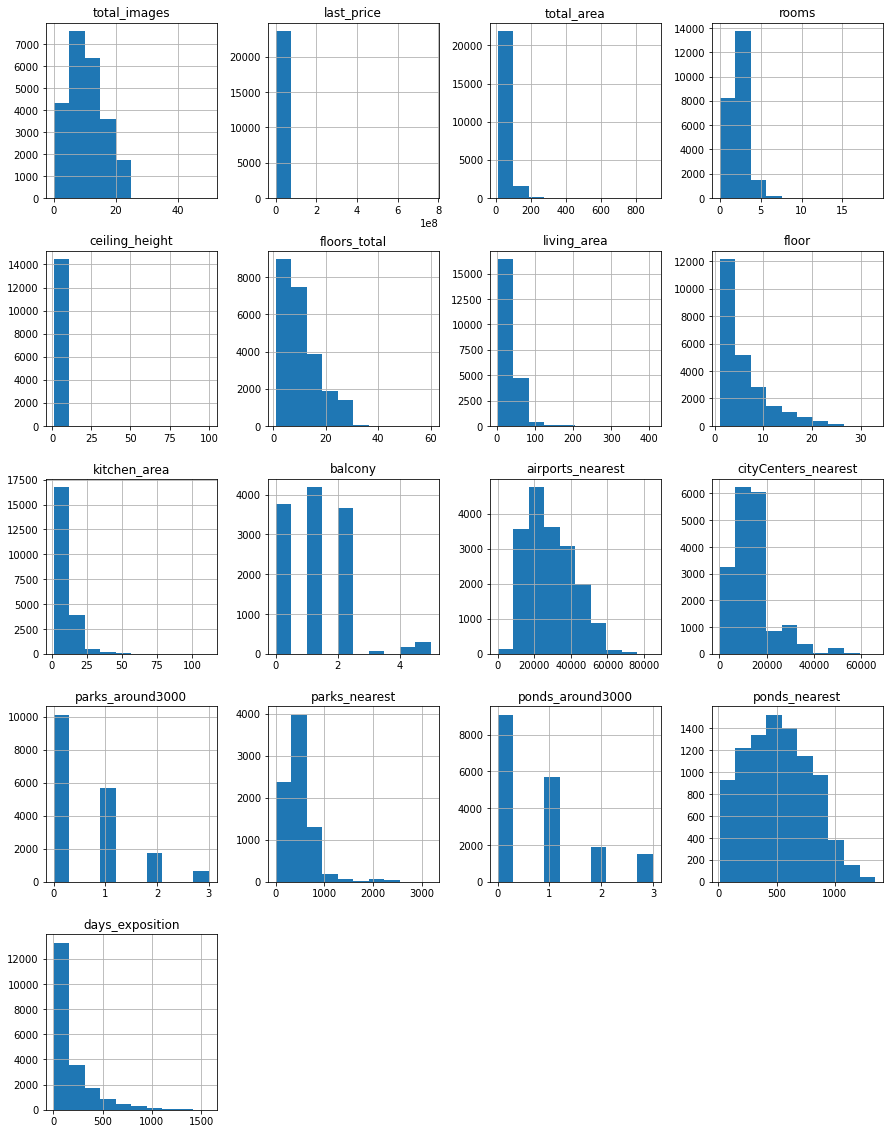

In [4]:
data.hist(figsize=(15, 20))

Считаем количество пропусков

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод: Мы вывели всю необходимую информацию для анализа. Как можем заметить, в таблице есть пропуски, выбросы и аномалии. Также некоторые столбцы не соответствуют своему типу данных, поэтому в ходе анализа мы это исправим.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> После того, как ты рассмотрела данные, стоит составить их краткое описание: количество пропусков, какие формы распределения данных наблюдаются, соответствуют ли типы данных предполагаемым значениям в столбцах.

### Выполните предобработку данных


Правим название столбца **cityCenters_nearest**

In [6]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
data['city_centers_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

Заполняем пропуски. Заполним пропуски в столбце **balcony** нулем, так как в квартирах их может не быть

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Крайне не хватает твоих комментариев с объяснением твоих действий. Например, ты обрабатываешь пропуски, вместо них вставляешь какие-то значения, а почему ты вставляешь именно их, должно быть логичное объяснение такой обработки, ты должна это в явном виде прописать для каждого параметра. Если пропуски не обрабатываются, то нужно объяснить также по какой причине их не получится восстановить.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо

In [7]:
data['balcony'].fillna(0, inplace=True)

В столбцах **parks_around3000** и **ponds_around3000** заполним пропуски нулем, ведь они тоже могут быть не указаны в объявлении по причине их отсутствия поблизости

In [8]:
data['parks_around3000'].fillna(0, inplace=True)
data.query('parks_nearest == 0 and parks_around3000 == 0')
data['parks_around3000']

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: parks_around3000, Length: 23699, dtype: float64

In [9]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.query('ponds_nearest == 0 and ponds_around3000 == 0')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В параметрах выше можно пропуски заполнить нулем, правильно.

В следующих столбцах мы оставим пропуски, чтобы избежать некорректных вычислений и нереальных значений при написании кода:
- **airports_nearest**
- **city_centers_nearest**
- **parks_nearest**
- **ponds_nearest**
- **days_exposition**

Меняем тип данных, чтобы при вычислениях не выходила ошибка

In [10]:
data['total_images'].astype('int')

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

In [11]:
data['last_price'].astype('int')

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int64

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [13]:
data['is_apartment'].astype('bool')

0        True
1        True
2        True
3        True
4        True
         ... 
23694    True
23695    True
23696    True
23697    True
23698    True
Name: is_apartment, Length: 23699, dtype: bool

In [14]:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce')
data['balcony']

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23699, dtype: float64

In [15]:
data['airports_nearest'] = pd.to_numeric(data['airports_nearest'], errors='coerce').astype('Int64')
data['airports_nearest']

0        18863
1        12817
2        21741
3        28098
4        31856
         ...  
23694    24665
23695     <NA>
23696     <NA>
23697    39140
23698     <NA>
Name: airports_nearest, Length: 23699, dtype: Int64

In [16]:
data['city_centers_nearest'] = pd.to_numeric(data['city_centers_nearest'], errors='coerce').astype('Int64')
data['city_centers_nearest']

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695     <NA>
23696     <NA>
23697    10364
23698     <NA>
Name: city_centers_nearest, Length: 23699, dtype: Int64

In [17]:
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce').astype('Int64')
data['parks_around3000']

0        1
1        0
2        1
3        2
4        2
        ..
23694    1
23695    0
23696    0
23697    2
23698    0
Name: parks_around3000, Length: 23699, dtype: Int64

In [18]:
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce').astype('Int64')
data['parks_nearest']

0         482
1        <NA>
2          90
3          84
4         112
         ... 
23694     796
23695    <NA>
23696    <NA>
23697     173
23698    <NA>
Name: parks_nearest, Length: 23699, dtype: Int64

In [19]:
data['ponds_around3000'].astype('int')

0        2
1        0
2        2
3        3
4        1
        ..
23694    3
23695    0
23696    0
23697    3
23698    0
Name: ponds_around3000, Length: 23699, dtype: int64

In [20]:
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest'], errors='coerce')
data['ponds_nearest']

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

Заменяем дубликаты, оставим только названия

In [69]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок','при железнодорожной станции', 'платформа', 'садоводческое некоммерческое товарищество',
             'садовое товарищество', 'станции', 'село', 'пансионат', 'городского типа',
             'деревня ', 'городской поселок', 'попокк', 'городской', 'коттеджный', 'пок'], '', regex=True)
)
data['locality_name'].unique()

array(['санкт-петербург', ' шушары', '  янино-1', ' парголово', ' мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', '  красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       ' металлострой', '  лебяжье', '  сиверский', ' молодцово',
       '  кузьмоловский', ' новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', ' аннино', '  ефимовский', ' плодовое', 'заклинье',
       ' торковичи', ' первомайское', 'красное ', ' понтонный',
       'сясьстрой', 'старая', 'лесколово', ' новый свет', 'сланцы',
       ' путилово', 'ивангород', 'мурино', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', ' романовка',
       ' бугры', '  рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       ' павлово', ' оредеж', ' копорье', ' молодежное', 'тихвин',
       ' победа', 'нурма', '  синяв

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Неявные дубликаты обработала правильно, молодец!

Заполним пропуски в **locality_name**

In [22]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].isna().sum()

0

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Можно было удалить объявления с пропусками в названии населенного пункта, их мало и на анализ это никак не повлияет, эти объявления мало пользы принесут при анализе, так как мы не знаем что это за населенный пункт, корректные ли значения в этих объявлениях.

Заполняем пропуски в **ceiling_height** медианным значением

In [23]:
len(data[data['ceiling_height'].isna()])

9195

In [24]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].sort_values(ascending=False).head(25)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
Name: ceiling_height, dtype: float64

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Пропуски можно восстановить медианой, согласен.

Убираем аномалии в **ceiling_height**

In [25]:
# Вычисление межквартильного размаха (IQR)
Q1 = data['ceiling_height'].quantile(0.25)
Q3 = data['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1
#Определение границ для допустимых значений
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Удаляем выбросы из датафрейма
data_cleaned = data[(data['ceiling_height'] >= lower_bound) & (data['ceiling_height'] <= upper_bound)]
data['ceiling_height']

0        2.70
1        2.65
2        2.65
3        2.65
4        3.03
         ... 
23694    3.70
23695    2.65
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Выбросы не нужно менять на медиану, их лучше удалить из датафрейма, чтобы дальнейший анализ не искажать. Выбросы это или реальные значения выбивающиеся, или техническая ошибка, при этом в таких объявлениях и другие параметры могут выбиваться, а ты меняешь только высоту, потом можно запутаться в анализе.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Объявления с пропусками в количестве этажей также лучше удалить, медианой заполнять не стоит, с точки зрения логики не понятно как это аргументируется, также могут возникнуть ситуации, что этаж квартиры больше количества этажей в здании.

Заменяем пропуски в **living_area** средним коэффициентом отношения жилой площади к общей, умножив его на общую площадь с пропущенной жилой

In [26]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
mean_living_area_ratio = data['living_area_ratio'].mean()
data['living_area'].fillna(mean_living_area_ratio * data['total_area'], inplace=True)
data['living_area'].unique()

array([51.        , 18.6       , 34.3       , ..., 42.55      ,
       45.35067139, 43.34575379])

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Жилую площадь можно было бы восстановить более точным способом. Посмотри на коэффициент корреляции ее с общей площадью. Можно отталкиваться от общей площади для восстановления. Например, посчитать отношения жилых площадей к общим, взять средний коэффициент отношения и с его помощью восстановить пропуски, умножив его на общую площадь в объявлениями с пропущенной жилой.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала, молодец!

Заменяем пропуски в **is_apartment** на False

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

Заполняем пропуски в **kitchen_area** средним коэффициентом отношения площади кухни к общей, умножив его на общую площадь с пропущенной площадью кухни

In [28]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
mean_kitchen_area_ratio = data['kitchen_area_ratio'].mean()
data['kitchen_area'].fillna(mean_kitchen_area_ratio * data['total_area'], inplace=True)
data['kitchen_area']

0        25.000000
1        11.000000
2         8.300000
3        29.789403
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696    10.623014
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23699, dtype: float64

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Также не особо понятно почему 0, можно было бы использовать метод, который я описал для жилой площади.

Проверим типы данных

In [29]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest                 Int64
city_centers_nearest             Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
living_area_ratio              float64
kitchen_area_ratio             float64
dtype: object

Вывод:
- Изменили тип данных некоторых столбцов для проведения вычислений и безошибочной работы кода
- Привели столбец city_centers_nearest в порядок, чтоб выглядел как все
- Заполнили пропуски, заменив значения на 0, неизвестные значения, медианные значения и коэффициентом отношения площади
- Заменили дубликаты в locality_name                   
- Убрали аномалии в ceiling_height

Почему могли возникнуть пропуски:
- Сбои в программе
- Человеческий фактор
- Нарочные пропуски, где поле является необязательным для заполнения

### Добавьте в таблицу новые столбцы

Добавим столбец price_one_qmeter (цена за 1 квадратный метр) и округлим до двух знаков после запятой

In [30]:
data['price_one_qmeter'] = (data['last_price'] / data['total_area']).round(2)
data['price_one_qmeter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

Добавим weekday_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [31]:
data['publication_date'] = pd.to_datetime(data['first_day_exposition'])
data['weekday_publication'] = data['publication_date'].dt.weekday
data['weekday_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

Добавим publication_month месяц публикации

In [32]:
data['publication_month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['publication_month'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

Добавим publication_year год публикации

In [33]:
data['publication_year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['publication_year'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

Добавим type_floor для определения типа этажа (значения — «первый», «последний», «другой»)

In [34]:
max_floor = data['floors_total'].max()
def type_floor(floor):
    if floor == 1:
        return 'первый'
    if floor == max_floor:
        return 'последний'
    else:
        return 'другой'
data['type_floor'] = data['floors_total'].apply(type_floor)
data['type_floor'].unique()

array(['другой', 'последний', 'первый'], dtype=object)

Добавим city_centers_nearest_km (переведем из м в км, округляем до целого)

In [35]:
data['city_centers_nearest_km'] = np.ceil(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'].unique()

<FloatingArray>
[17.0, 19.0, 14.0,  7.0,  9.0, <NA>, 20.0, 12.0, 16.0, 52.0, 34.0, 31.0, 15.0,
 11.0, 13.0, 10.0,  3.0, 33.0,  4.0,  5.0, 50.0, 24.0, 28.0,  8.0,  6.0, 27.0,
 22.0, 51.0, 18.0, 53.0, 49.0, 35.0, 37.0,  2.0, 36.0, 25.0, 30.0, 32.0, 26.0,
 54.0, 55.0, 21.0,  1.0, 23.0, 66.0, 47.0, 40.0, 29.0, 57.0, 42.0, 43.0, 63.0,
 60.0, 41.0, 65.0, 39.0, 44.0, 48.0, 38.0, 46.0, 62.0, 61.0]
Length: 62, dtype: Float64

Добавили в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы создала правильно, подходящие методы использовала.

### Проведите исследовательский анализ данных

In [36]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Для описания графика возьмем значения от минимального до 100 кв.м.

<AxesSubplot:>

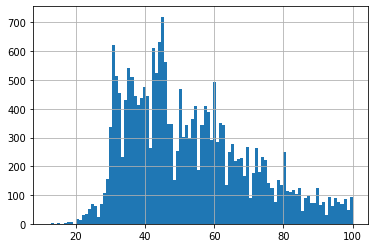

In [37]:
data['total_area'].hist(bins=100, range=(12, 100))

Вывод: Диаграмма показывает, что самый высокий спрос приходится на квартиры общей площадью от 40 до 69 квадратных метров. Вероятно, что такая площадь самая оптимальная для жизни одного или двух человек.

In [38]:
data['living_area'].describe()

count    23699.000000
mean        34.562480
std         22.326965
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

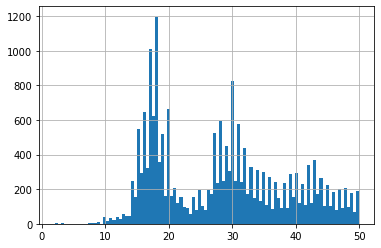

In [39]:
data['living_area'].hist(bins=100, range=(2, 50))

Вывод: Больше всего продают квартиры с жилой площадью около 20 кв. метров и около 30 кв. метров. Между ними образовалась яма в виде малого количества квартир с жилой площадью 22-23 кв. метров. 

In [40]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.572683
std          6.095394
min          1.300000
25%          7.000000
50%          9.080000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

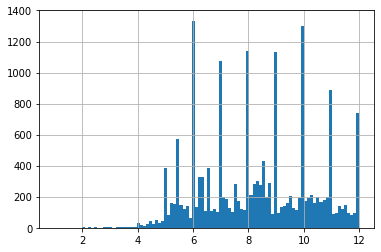

In [41]:
data['kitchen_area'].hist(bins=100, range=(1, 12))

Вывод: Большиство продаваемых квартир имеют площадь кухни в среднем 10 кв.метров. Также можно заметить, что самый высокий спрос на площадь с целым числом. Возможно, в объявлениях они указаны в округленных числах.

In [42]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

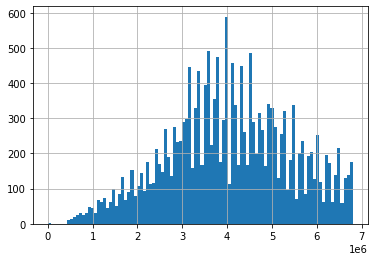

In [43]:
data['last_price'].hist(bins=100, range=(1.219000e+04, 6.800000e+06))

Вывод: По графику мы видим, что у большинства квартир в объявлениях указана стоимость около 4 млн. 

In [44]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

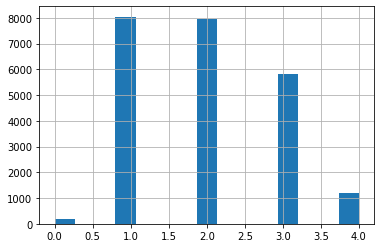

In [45]:
data['rooms'].hist(bins=15, range=(0,4))

Вывод: Интересно, что в статистику вошли объявления о продаже квартир с отсутствием комнат. Возможно, их не указали, потому что в объявлениях однокомнатные студии или "еврооднушки", там нет необходимости указывать количество комнат. Кроме того, продается большинство однокомнатных и двухкомнатных квартир. 

In [46]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

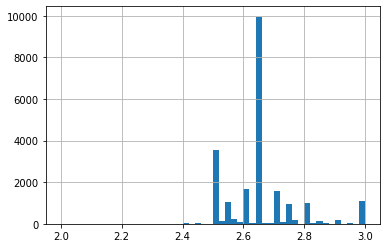

In [47]:
data['ceiling_height'].hist(bins=50, range=(2,3))

Вывод: В среднем высота потолков квартир составляет 2,7 метров.

Сгруппируем таблицу для подсчета средней цены за квартиру в зависимости от типа этажа и построим график

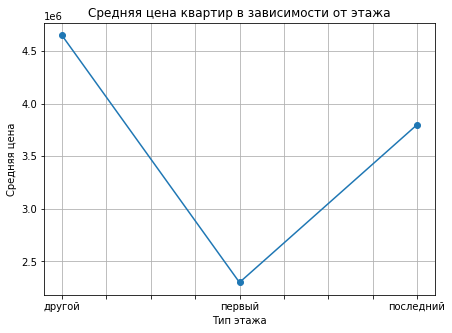

In [48]:
(
    data.groupby('type_floor')['last_price'].median()
    .plot(style='o-', grid=True, figsize=(7, 5), title='Средняя цена квартир в зависимости от этажа')
)
plt.ylabel('Средняя цена')
plt.xlabel('Тип этажа')
plt.show()

Вывод: Самые дорогостоящие квартиры находятся на "другом" этаже, так как таких этажей больше, чем первых и последних. Что касается первых этажей, возможно, эти квартиры выставляют по низкой цене из-за того, что площадь квартир меньше (на первых этажах могут быть коммуналки) или люди хотят поскорее переехать на этаж повыше. На покупку квартиры на последнем этаже не так много желающих, возможно, из-за долгого ожидания лифта или боязни высоты.

In [49]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

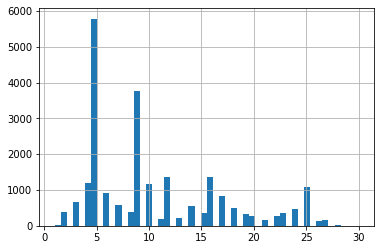

In [50]:
data['floors_total'].hist(bins=50, range=(1, 30))

Вывод: В среднем квартиры продаются примерно на 10 этаже. Большинство продаваемых квартир находится на 5-9 этаже, так как в основном это пятиэтажки и девятиэтажки.

In [51]:
data['city_centers_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

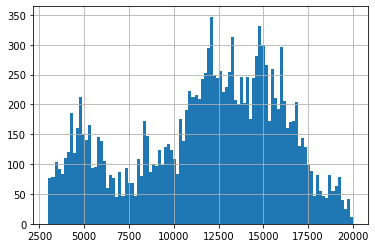

In [52]:
data['city_centers_nearest'].hist(bins=100, range=(3000, 20000))

Вывод: Примерно от 11500 до 15000 метров от дома находится центр города. Это означает, что большинство квартир продается ближе к краю города или за его пределами.

In [53]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

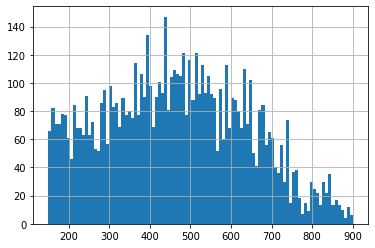

In [54]:
data['parks_nearest'].hist(bins=100, range=(150, 900))

Вывод: В среднем на расстоянии 300-600 метров находится парк от места нахождения квартиры. Наличие вблизи от дома парка не влияет на количество объявлений.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Параметры все рассмотрела отлично, похвально, что информативные гистограммы для каждого построила, подобрала параметры range и bins. По выводам все верно, продолжай в том же духе!

**Изучите, как быстро продавались квартиры (столбец days_exposition)**

Опишем столбец **days_exposition** и построим гистограмму

In [55]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

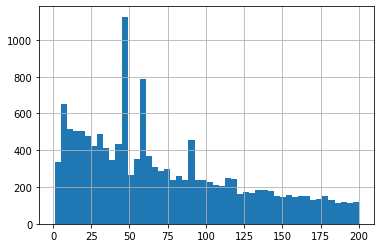

In [56]:
data['days_exposition'].hist(bins=50, range=(1, 200))

Вывод: Судя по графику, квартиры продаются довольно быстро. За 2 месяца вполне реально продать квартиру. Медианное значение показывает, что за 95 дней продается квартира, что кажется реальнее, чем среднее 180 дней.

Время продажи квартиры варьируется от различных факторов (площадь, количество комнат, этаж и др.). Мы уже выяснили, что большинство квартир продается за 2-3 месяца.

Быстрыми продажами можно считать проданные квартиры за 30 дней. Вероятно, на такие квартиры повышенный спрос, и они имеют факторы и условия, удовлетворяющие большинство потенциальных покупателей.

Долгими продажами можно считать предложения, которым уже больше 4 месяцев. Вероятно, это зависит от состояния квартиры, ее местоположения, хотя может повлиять и завышенная цена.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно отметила, полностью с тобой согласен.

**Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта**

Сделаем корреляцию, чтобы проанализировать зависимость цены от заданных параметров.

In [57]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.653675,0.585658,0.516620,0.363343
total_area,0.653675,1.000000,0.945860,0.662368,0.758344
living_area,0.585658,0.945860,1.000000,0.505205,0.827606
kitchen_area,0.516620,0.662368,0.505205,1.000000,0.327228
rooms,0.363343,0.758344,0.827606,0.327228,1.000000


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Почему ты смотришь на корреляцию по сводной таблице, а не по исходному датафрейму?

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Сейчас все корректно

Построим график для анализа

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Ниже для непрерывных величин (площадей) не нужно рассчитывать сводную таблицу для построения диаграммы рассеяния. Построй их по исходному датафрейму. Рассчитывая сводную таблицу ты исходное распределение можешь исказить, так как ты усредняешь все значения. А по исходному датафрейму ты увидишь, и форму распределения, и наклон распределения, показывающий линейную зависимость.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно, можно было графики не обрезать, чтобы полностью распределение увидеть.

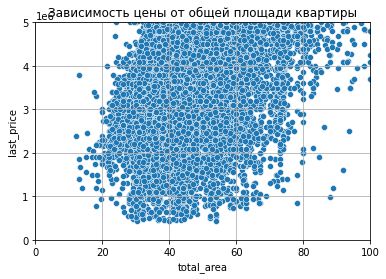

In [58]:
import seaborn as sns
total_area_filtered = data[data['total_area'] <= 30]
#total_area_filtered.pivot_table(index='total_area', values='last_price')
sns.scatterplot(x='total_area', y='last_price', data=data)

plt.title('Зависимость цены от общей площади квартиры')
plt.xlim(0, 100)
plt.ylim(0, 5000000)
plt.grid(True)
plt.show()

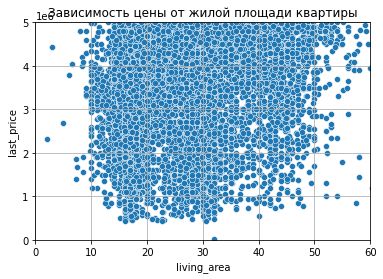

In [59]:
living_area_filtered = data[data['living_area'] <=20]
#living_area_filtered.pivot_table(values='last_price', index='living_area')
sns.scatterplot(x='living_area', y='last_price', data=data)

plt.title('Зависимость цены от жилой площади квартиры')
plt.xlim(0, 60)
plt.ylim(0, 5000000)
plt.grid(True)
plt.show()

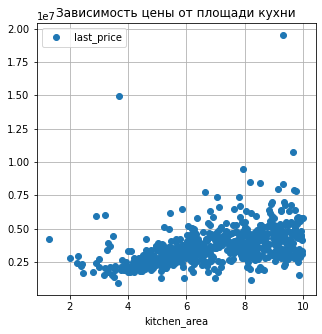

In [60]:
kitchen_area_filtered = data[data['kitchen_area'] <= 10]
(
    kitchen_area_filtered.pivot_table(values='last_price', index='kitchen_area')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

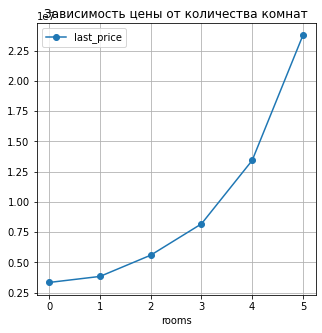

In [61]:
rooms_filtered = data[data['rooms'] <= 5]
(
    rooms_filtered.pivot_table(values='last_price', index='rooms')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от количества комнат')
plt.show()

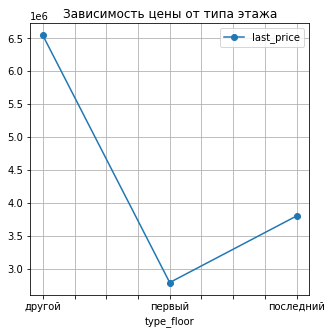

In [62]:
floor_filtered = data[data['floor'] >= 1]
(
    floor_filtered.pivot_table(values='last_price', index='type_floor')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от типа этажа')
plt.show()

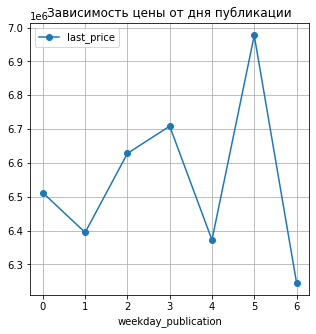

In [63]:
weekday_publication_filtered = data[data['weekday_publication'] >= 0]
(
    weekday_publication_filtered.pivot_table(values='last_price', index='weekday_publication')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

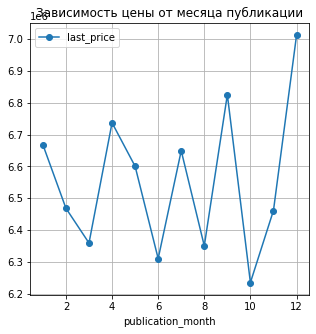

In [64]:
publication_month_filtered = data[data['publication_month'] >= 0]
(
    publication_month_filtered.pivot_table(values='last_price', index='publication_month')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

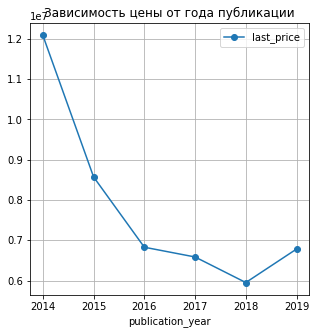

In [65]:
publication_year_filtered = data[data['publication_year'] >= 0]
(
    publication_year_filtered.pivot_table(values='last_price', index='publication_year')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

**Вывод по всем параметрам:** На стоимость квартиры может влиять много факторов. Некоторые из них: общая площадь квартиры, локация/район, инфраструктура, состояние дома, транспортная развязка и другие удобства (балкон/лоджия, подземная/надезмная парковка).

Исходя из того, что показывают графики, можем сказать, что чем больше площадь жилья, тем выше цена, между ними прямая зависимость. Это касается и площади кухни, и количества комнат. 

Прослеживается зависимость стоимости квартиры и типа этажа, на котором она расположена. Самые дешевые квартиры на первых этажах и чуть дороже на последних. Ранее мы говорили о том, что самые дорогие квартиры находятся на "другом" этаже, так как таких этажей намного больше первых и последних. Такие квартиры могут иметь больше удовлетворяющих факторов для будущих жильцов, так как квартира может находиться не высоко и не низко, не влияет на страх высоты, хороший вид из окна и другие факторы.

Дата публикации не сильно влияет на стоимость продажи, кроме того, что каждый год недвижимость может дешеветь или дорожать.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, видно, что цена больше всего зависит от площадей, количества комнат и типа этажа.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [66]:
table = data.groupby('locality_name').agg(
    ads=('price_one_qmeter', 'count'),
    avg_price_one_qmeter=('price_one_qmeter', 'mean')
).reset_index() # делаем сводную таблицу с количеством объявлений и средней ценой за квадратный метр

table['avg_price_one_qmeter'] = table['avg_price_one_qmeter'].round(2) # округлим средннюю цену за квадратный метр

top_locality_name = table.sort_values(by='ads', ascending=False) # отсортируем количество объявлений по убыванию
highest_price_one_qmeter = table.loc[table['avg_price_one_qmeter'].idxmax()] # найдем населенный пункт с высокой стоимостью квадратного метра 
lowerest_price_one_qmeter = table.loc[table['avg_price_one_qmeter'].idxmin()] # найдем населенный пункт с низкой стоимостью квадратного метра

print(top_locality_name.head(10))
print(highest_price_one_qmeter)
print(lowerest_price_one_qmeter)

       locality_name    ads  avg_price_one_qmeter
283  санкт-петербург  15721             114849.01
100           мурино    556              85681.76
226          кудрово    472              95324.93
170           шушары    440              78677.36
191       всеволожск    398              68654.47
274           пушкин    369             103125.82
218          колпино    338              75424.58
109        парголово    327              90175.91
196          гатчина    307              68746.15
192           выборг    237              58141.91
locality_name           зеленогорск
ads                              24
avg_price_one_qmeter       115122.8
Name: 202, dtype: object
locality_name           старополье
ads                              3
avg_price_one_qmeter      11206.22
Name: 294, dtype: object


Вывод: Мы вывели 10 населенных пунктов с наибольшим числом объявлений и средней ценой квадратного метра. Больше всего объявлений в Санкт-Петербурге, но в Зеленогорске квадратный метр стоит дороже. Самый дешевый квадратный метр в Старополье - это маленькая деревня в Ленинградской области. Скорее всего условия жизни в этой деревне повлияли на дешевизну квадратного метра.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В этом пункте все правильно рассчитала, так держать!

**Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра**

    city_centers_nearest_km    last_price
0                       1.0  2.344232e+07
1                       2.0  1.885085e+07
2                       3.0  1.616331e+07
3                       4.0  1.343683e+07
4                       5.0  1.363202e+07
5                       6.0  1.530612e+07
6                       7.0  1.438911e+07
7                       8.0  1.279767e+07
8                       9.0  8.445272e+06
9                      10.0  6.426055e+06
10                     11.0  6.376092e+06
11                     12.0  5.977039e+06
12                     13.0  5.980211e+06
13                     14.0  6.016125e+06
14                     15.0  5.768324e+06
15                     16.0  5.545776e+06
16                     17.0  5.527928e+06
17                     18.0  4.865574e+06
18                     19.0  5.334929e+06
19                     20.0  4.678756e+06
20                     21.0  6.365864e+06
21                     22.0  5.183239e+06
22                     23.0  5.425

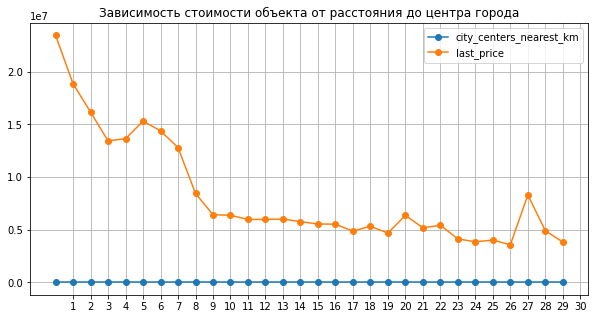

In [67]:
spb_data = data[data['locality_name'] == 'санкт-петербург'] # Отфильтруем таблицу по одному городу
avg_price = spb_data.groupby('city_centers_nearest_km')['last_price'].mean().reset_index() # Сгруппируем квартиры в Санкт_Петербурге по расстоянию от центра города, вычислим средннюю стоимость на каждый километр и сбросим индекс
print(avg_price)
    
avg_price.plot(grid=True, style='o-', figsize=(10, 5)) # Построим график для каждого километра
plt.title('Зависимость стоимости объекта от расстояния до центра города')
plt.xticks(avg_price['city_centers_nearest_km'])
plt.show()

Вывод: Чем ближе к центру квартира, тем она дороже. Несмотря на близость квартиры к центру города, ее стоимость может быть довольно высокой. Должно быть, в таких районах, где дорогие квартиры далеко от центра, хорошо развита инфраструктура, состояние объекта очень хорошее и др.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, прослеживается общая тенденция снижения цены при удалении от центра.

### Напишите общий вывод

В ходе исследования объявлений о продаже квартир мы выполнили поэтапно план  и сделали выводы:

1. Открыли файл с данными и изучили общую информацию.
В таблице 23699 записи. Выяснили, что явные дубликаты отсутствуют. Вывели всю необходимую информацию с помощью графиков для анализа.

2. Выполнили предобработку данных.
Нашли пропуски в таблице, заполнили их, где это возможно, а также указали причины, почему они могли возникнуть:
- Сбои в программе
- Человеческий фактор
- Нарочные пропуски, где поле является необязательным для заполнения

Изменили тип данных некоторых столбцов  для проведения вычислений и безошибочной работы кода, привели столбец city_centers_nearest к нижнему регистру и привели в порядок.
Заполнили пропуски, заменив значения на 0, неизвестные значения, медианные значения и коэффициентом отношения площади.
Заменили дубликаты в locality_name.
Убрали аномалии в ceiling_height.

В следующих столбцах мы оставили пропуски, чтобы избежать некорректных вычислений и нереальных значений при написании кода:
- **airports_nearest**
- **city_centers_nearest**
- **parks_nearest**
- **ponds_nearest**
- **days_exposition**

3. Добавили в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра - price_one_qmeter;
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.) - weekday_publication;
- месяц публикации объявления - publication_month;
- год публикации объявления - publication_year;
- тип этажа квартиры (значения — «первый», «последний», «другой») - type_floor;
- расстояние до центра города в километрах - city_centers_nearest_km.

4. Провели исследовательский анализ данных:

    1. Изучили параметры объектов с помощью графиков и описали наблюдения:
- Самый высокий спрос приходится на квартиры общей площадью от 40 до 69 квадратных метров. Вероятно, что такая площадь самая оптимальная для жизни одного или двух человек.
- Больше всего продают квартиры с жилой площадью около 20 кв. метров и около 30 кв. метров. 
- Большиство продаваемых квартир имеют площадь кухни в среднем 10 кв.метров. Самый высокий спрос на площадь с целым числом. Возможно, в объявлениях они указаны в округленных числах.
- У большинства квартир в объявлении указана стоимость около 4 млн.
- В статистику вошли объявления о продаже квартир с отсутствием комнат, где могли не указать их число, так как, например, в однокомнатных студиях или "еврооднушках" это необязательно.
- В среднем высота потолков квартир составляет 2,7 метров.
- Самые дорогостоящие квартиры находятся на "другом" этаже. Что касается первых этажей, возможно, эти квартиры выставляют по низкой цене из-за того, что площадь квартир меньше (на первых этажах могут быть коммуналки) или люди хотят поскорее переехать на этаж повыше. На покупку квартиры на последнем этаже не так много желающих, возможно, из-за долгого ожидания лифта или боязни высоты.
- В среднем квартиры продаются примерно на 10 этаже. Что касается первых этажей, возможно, эти квартиры выставляют по низкой цене из-за того, что площадь квартир меньше (на первых этажах могут быть коммуналки) или люди хотят поскорее переехать на этаж повыше. На покупку квартиры на последнем этаже не так много желающих, возможно, из-за долгого ожидания лифта или боязни высоты.
- Примерно от 11500 до 15000 метров от дома находится центр города. Это означает, что большинство квартир продается ближе к краю города или за его пределами.
- В среднем на расстоянии 300-600 метров находится парк от места нахождения квартиры. Наличие вблизи от дома парка не влияет на количество объявлений.

    Б. Изучили, как быстро продавались квартиры.
- Квартиры продаются довольно быстро. За 2 месяца вполне реально продать квартиру. Медианное значение показывает, что за 95 дней продается квартира, что кажется реальнее, чем среднее 180 дней.

- Время продажи квартиры варьируется от различных факторов (площадь, количество комнат, этаж и др.). Мы уже выяснили, что большинство квартир продается за 2-3 месяца.

- Быстрыми продажами можно считать проданные квартиры за 30 дней. Вероятно, на такие квартиры повышенный спрос, и они имеют факторы и условия, удовлетворяющие большинство потенциальных покупателей.

- Долгими продажами можно считать предложения, которым уже больше 4 месяцев. Вероятно, это зависит от состояния квартиры, ее местоположения, хотя может повлиять и завышенная цена.
    
    В. Определили факторы, которые больше всего влияют на общую стоимость квартиры.
- На стоимость квартиры может влиять много факторов, например, общая площадь квартиры, локация/район, инфраструктура, состояние дома, транспортная развязка и другие удобства (балкон/лоджия, подземная/надезмная парковка).

- Чем больше площадь жилья, тем выше цена, между ними прямая зависимость. Это касается и площади кухни, и количества комнат.

- Прослеживается зависимость стоимости квартиры и типа этажа, на котором она расположена. Самые дешевые квартиры на первых этажах и чуть дороже на последних.

- Дата публикации не сильно влияет на стоимость продажи, кроме того, что каждый год недвижимость может дешеветь или дорожать.    
    
    Г. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
    Больше всего объявлений в Санкт-Петербурге, но в Зеленогорске квадратный метр стоит дороже. Самый дешевый квадратный метр в Старополье - это маленькая деревня в Ленинградской области. Скорее всего условия жизни в этой деревне повлияли на дешевизну квадратного метра.
    
    Д. Выделили квартиры в Санкт-Петербурге и вычислили их среднюю стоимость на разном удалении от центра.
    Чем ближе к центру квартира, тем она дороже. Несмотря на близость квартиры к центру города, ее стоимость может быть довольно высокой. Должно быть, в таких районах, где дорогие квартиры далеко от центра, хорошо развита инфраструктура, состояние объекта очень хорошее и др.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно корректно обработать все признаки, добавить описание действий.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉